#### <a class="anchor" id="0"></a>

#  BOD prediction in river water

Build of the 15 most popular models, the most complex models from them are tuned (optimized)

Comparison of the optimal for each type models.

<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Import libraries](#1)
1. [Download datasets](#2)
1. [EDA](#3)
1. [Preparing to modeling](#4)
1. [Tuning models](#5)
    -  [Linear Regression](#5.1)
    -  [Support Vector Machines](#5.2)
    -  [Linear SVR](#5.3)
    -  [MLPRegressor](#5.4)
    -  [Stochastic Gradient Descent](#5.5)
    -  [Decision Tree Regressor](#5.6)
    -  [Random Forest with GridSearchCV](#5.7)
    -  [XGB](#5.8)
    -  [LGBM](#5.9)
    -  [GradientBoostingRegressor with HyperOpt](#5.10)
    -  [RidgeRegressor](#5.11)
    -  [BaggingRegressor](#5.12)
    -  [ExtraTreesRegressor](#5.13)
    -  [AdaBoost Regressor](#5.14)
    -  [VotingRegressor](#5.15)
1. [Models comparison](#6)
1. [Prediction](#7)
 8.[conclusion](#8)

## 1. Import libraries <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [6]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/70.9 MB 1.3 MB/s eta 0:00:55
   ---------------------------------------- 0.2/70.9 MB 1.5 MB/s eta 0:00:48
   ---------------------------------------- 0.3/70.9 MB 1.6 MB/s eta 0:00:46
   ---------------------------------------- 0.5/70.9 MB 1.6 MB/s eta 0:00:45
   ---------------------------------------- 0.6/70.9 MB 1.7 MB/s eta 0:00:41
   ---------------------------------------- 0.7/70.9 MB 1.6 MB/s eta 0:00:46
   ---------------------------------------- 0.7/70.9 MB 1.5 MB/s eta 0:00:47
   ---------------------------------------- 0.8/70.9 MB 1.4 MB/s eta 0:00:49
    ---------------------------

In [199]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [201]:
!pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.6 MB 1.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.6 MB 1.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.6 MB 980.4 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.6 MB 942.1 kB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.6 MB 930.9 kB/s eta 0:00:02
     --------- ------------------------------ 0.4/1.6 MB 1.0 MB/s eta 0:00:02
     ----------- ---------------------------- 0.4/1.6 MB 1.1 MB/s eta 0:00:02
     ------------- -------------------------- 0.5/1.6 MB 1.1 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.6 MB 1.2 MB/s eta 0:00:01
     ------------------- -------------------- 0.8/1.6 MB 1.3 MB/s eta 0:00:01
     ---------------------- ----------------- 0.9/1.6 MB 1.4 MB/s eta 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# Data Understanding
## 2. Download datasets <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [2]:
valid_part = 0.3

In [3]:
train0 =pd.read_csv('train.csv')
train0

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
1,3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
2,4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
3,5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
4,6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
142,208,2.20,5.00,5.80,NaN,NaN,NaN,NaN,NaN
143,211,5.60,8.00,8.00,NaN,NaN,NaN,NaN,NaN
144,212,6.00,6.80,7.20,NaN,NaN,NaN,NaN,NaN
145,213,8.00,5.20,7.80,NaN,NaN,NaN,NaN,NaN


In [4]:
train0.head()

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
1,3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
2,4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
3,5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
4,6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN


In [5]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


In [6]:
train0.columns

Index(['Id', 'target', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [7]:
train0.describe()

,Id,target,1,2,3,4,5,6,7
count,147.000000,147.000000,145.000000,145.000000,32.000000,31.000000,33.000000,37.000000,37.000000
mean,101.401361,5.021633,4.972621,4.906552,4.665000,5.871613,8.678788,3.883784,3.957568
std,64.836640,2.122535,2.044076,2.001357,2.057429,2.555247,5.299119,1.615455,1.916953
min,0.000000,1.300000,0.900000,1.040000,2.040000,2.480000,2.880000,1.000000,1.600000
25%,41.500000,3.720000,3.500000,3.400000,3.325000,4.445000,5.840000,2.900000,2.900000
50%,102.000000,4.600000,4.800000,4.830000,4.150000,5.500000,7.300000,3.400000,3.500000
75%,158.500000,6.275000,6.450000,6.200000,5.970000,6.400000,8.420000,4.800000,4.400000
max,214.000000,11.700000,10.900000,11.000000,10.660000,14.790000,27.120000,8.540000,10.370000


## 3. EDA <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

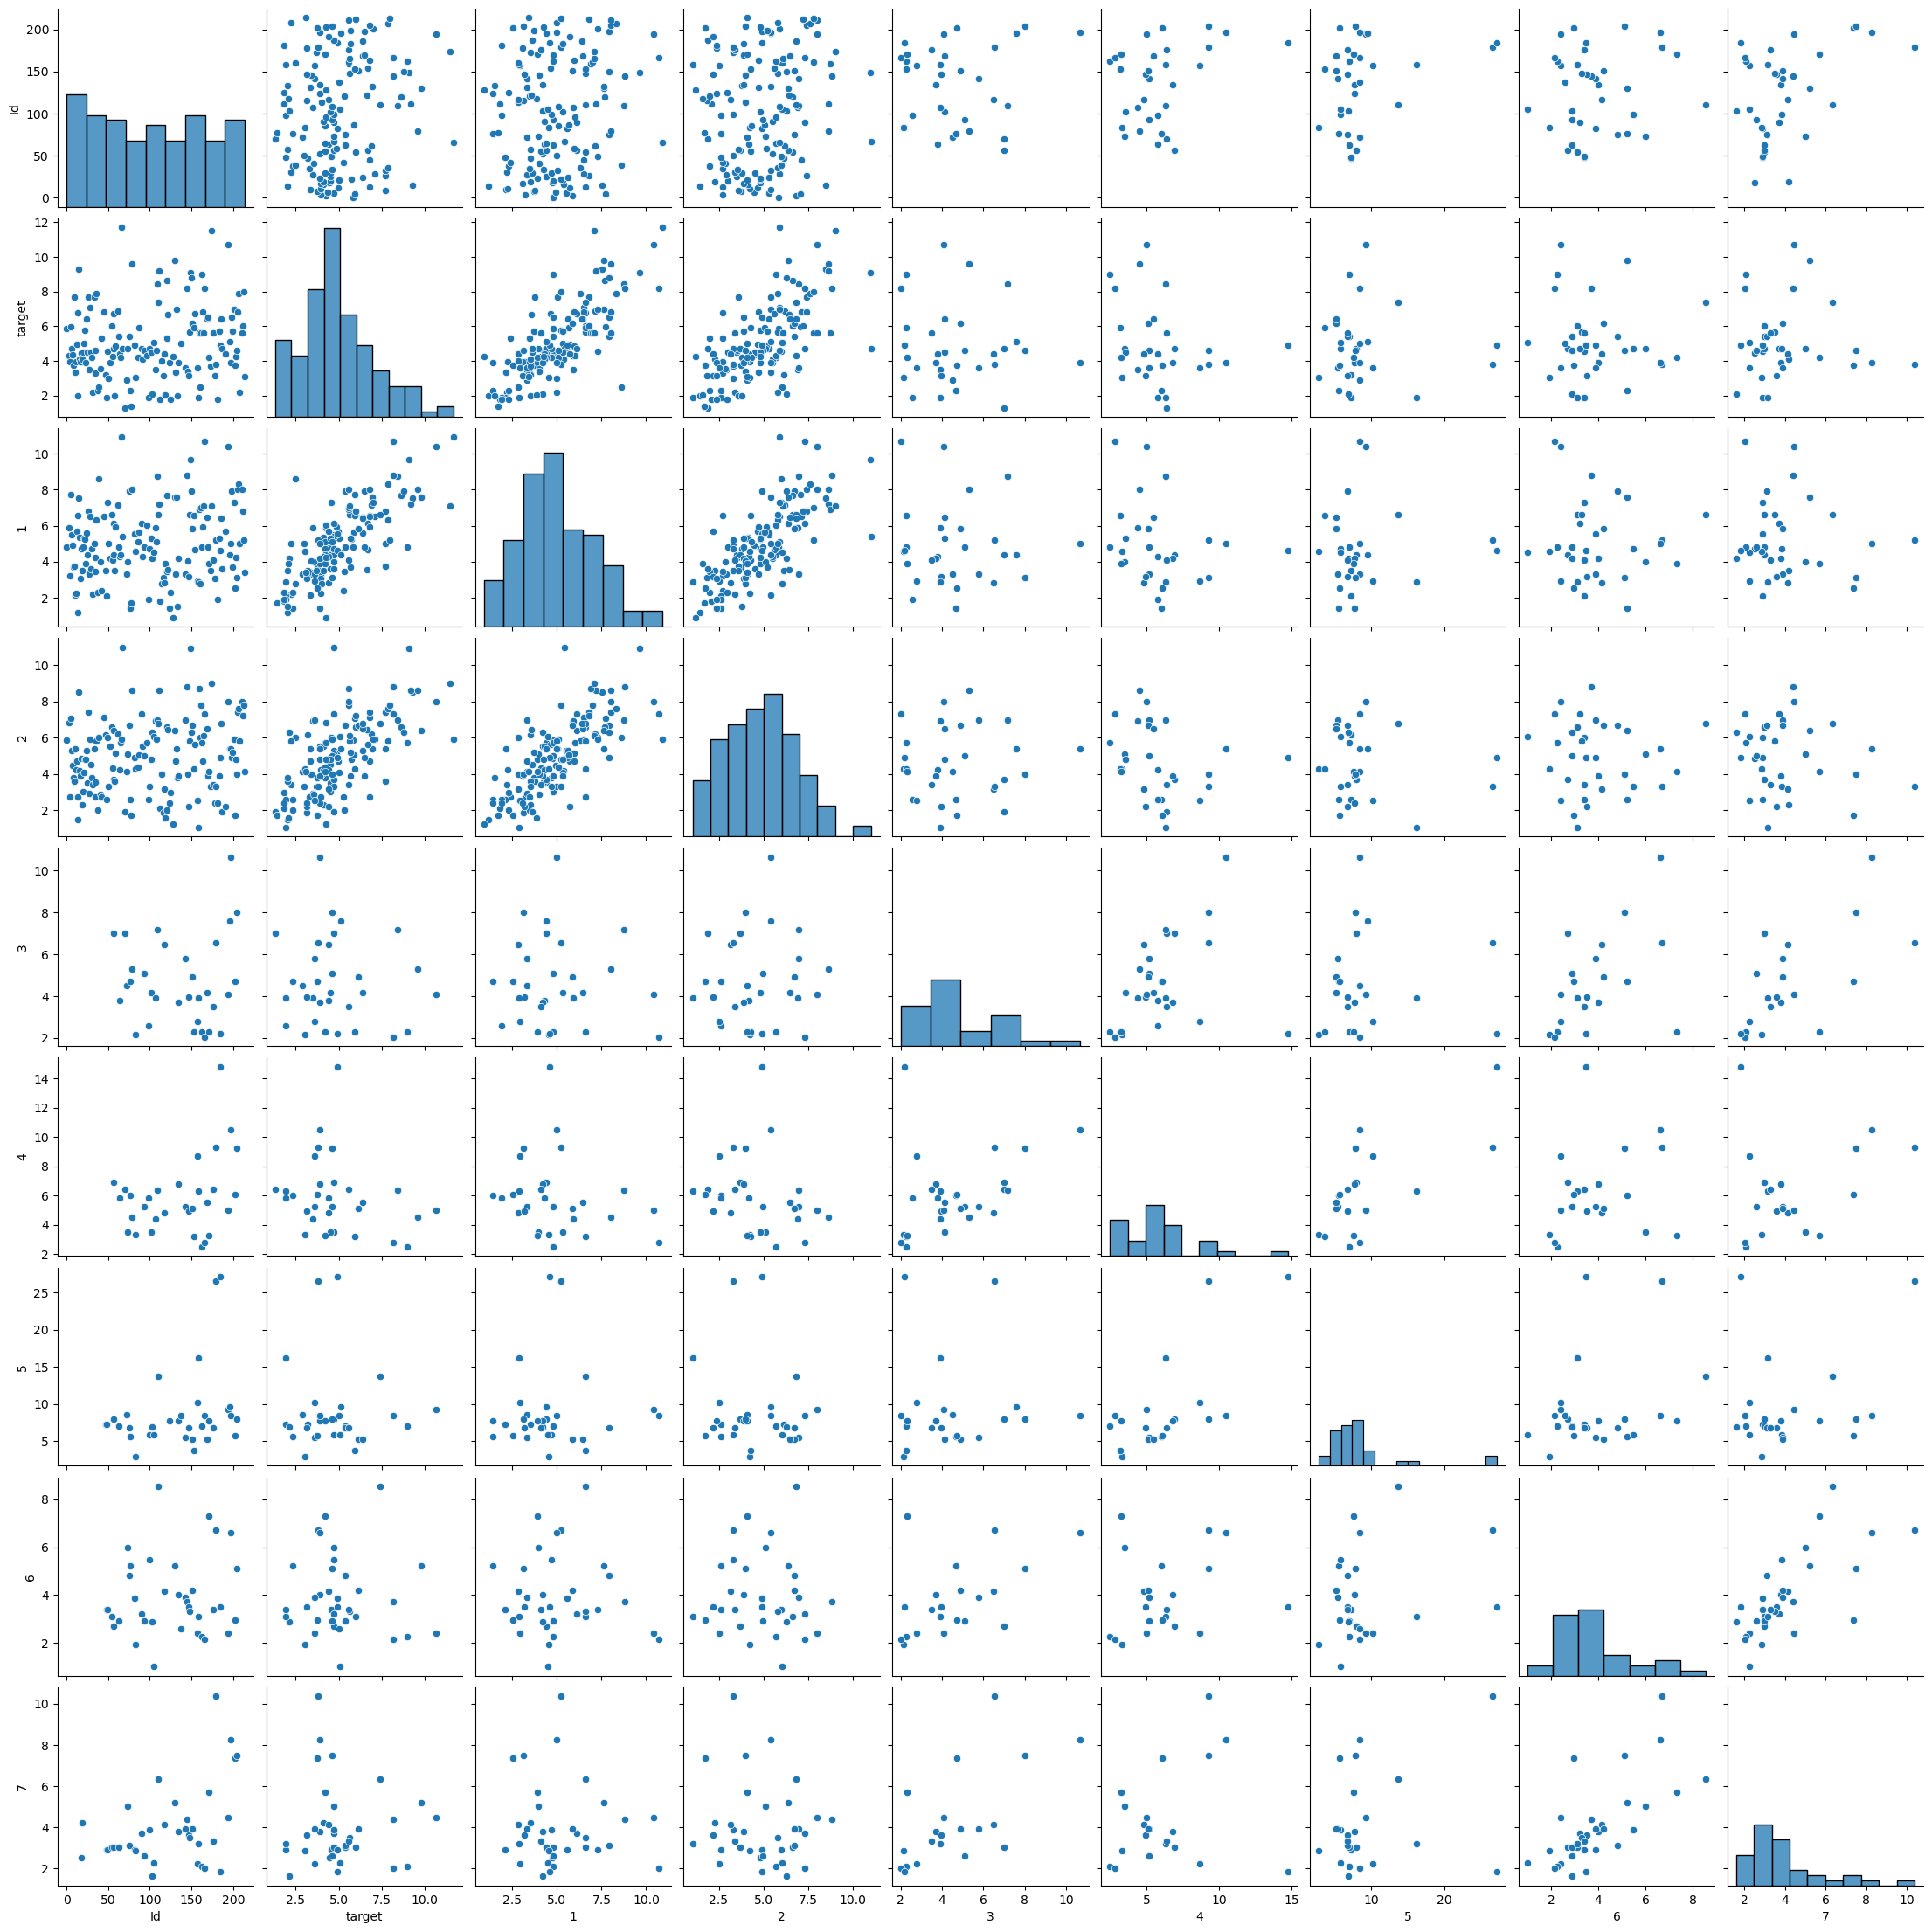

In [8]:
sns.pairplot(train0)

<Axes: ylabel='count'>

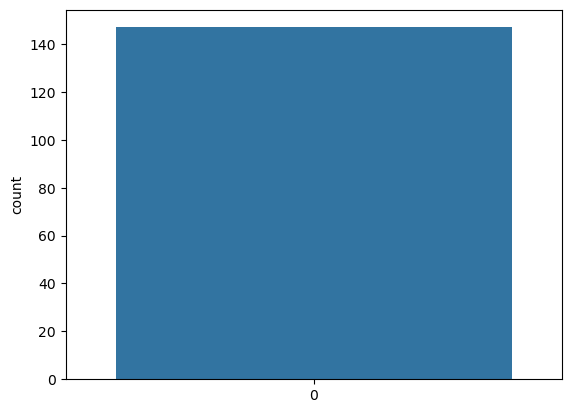

In [75]:
sns.countplot(train0['target'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_3360\1103731578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train0['target'])


<Axes: xlabel='target', ylabel='Density'>

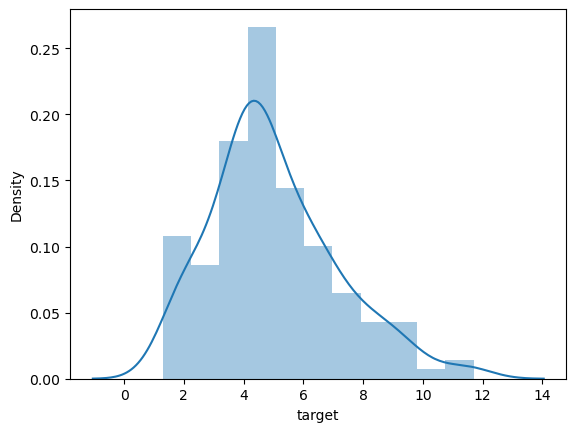

In [76]:
sns.distplot(train0['target'])

<Axes: ylabel='count'>

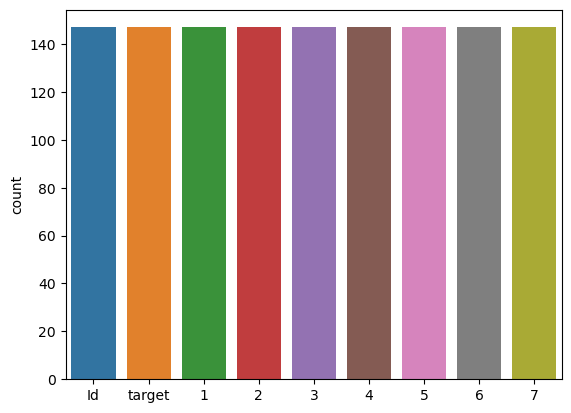

In [77]:
sns.countplot (train0)

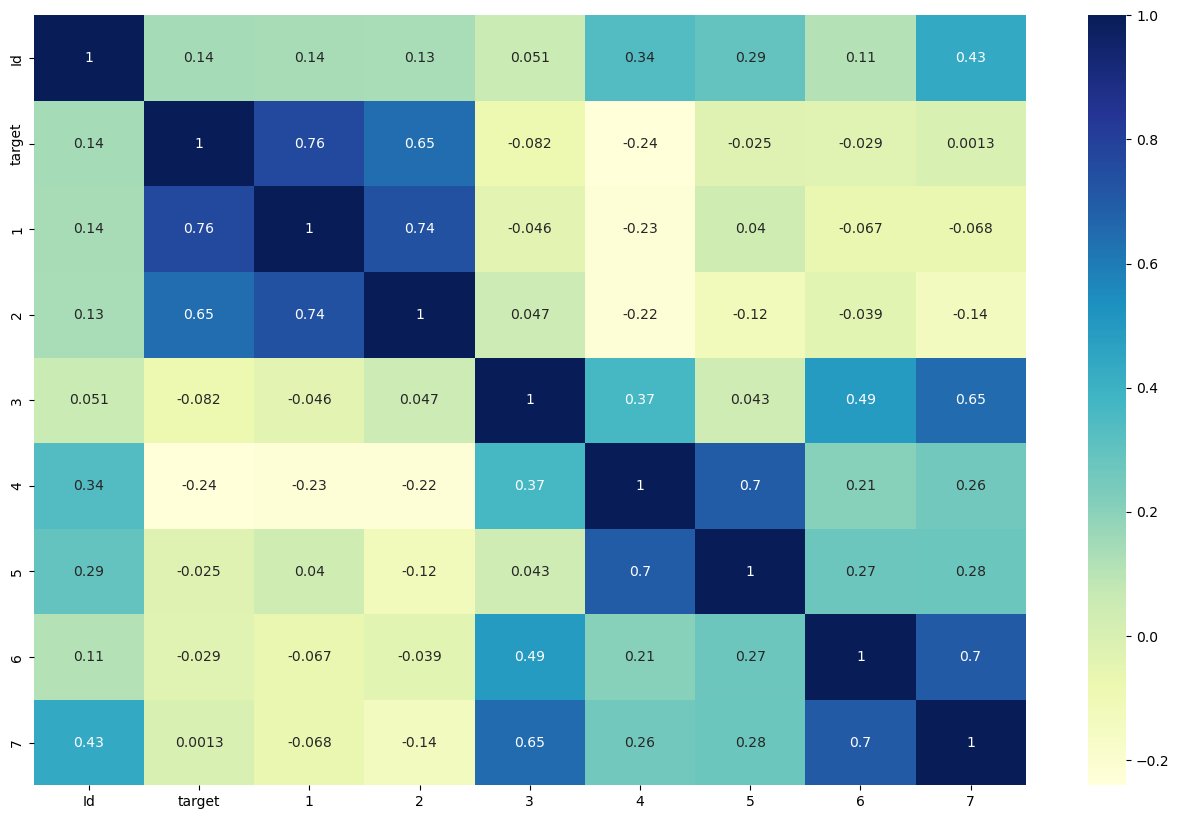

In [78]:
plt.figure(figsize = (16, 10))
sns.heatmap(train0.corr(), annot = True, cmap="YlGnBu")
plt.show()

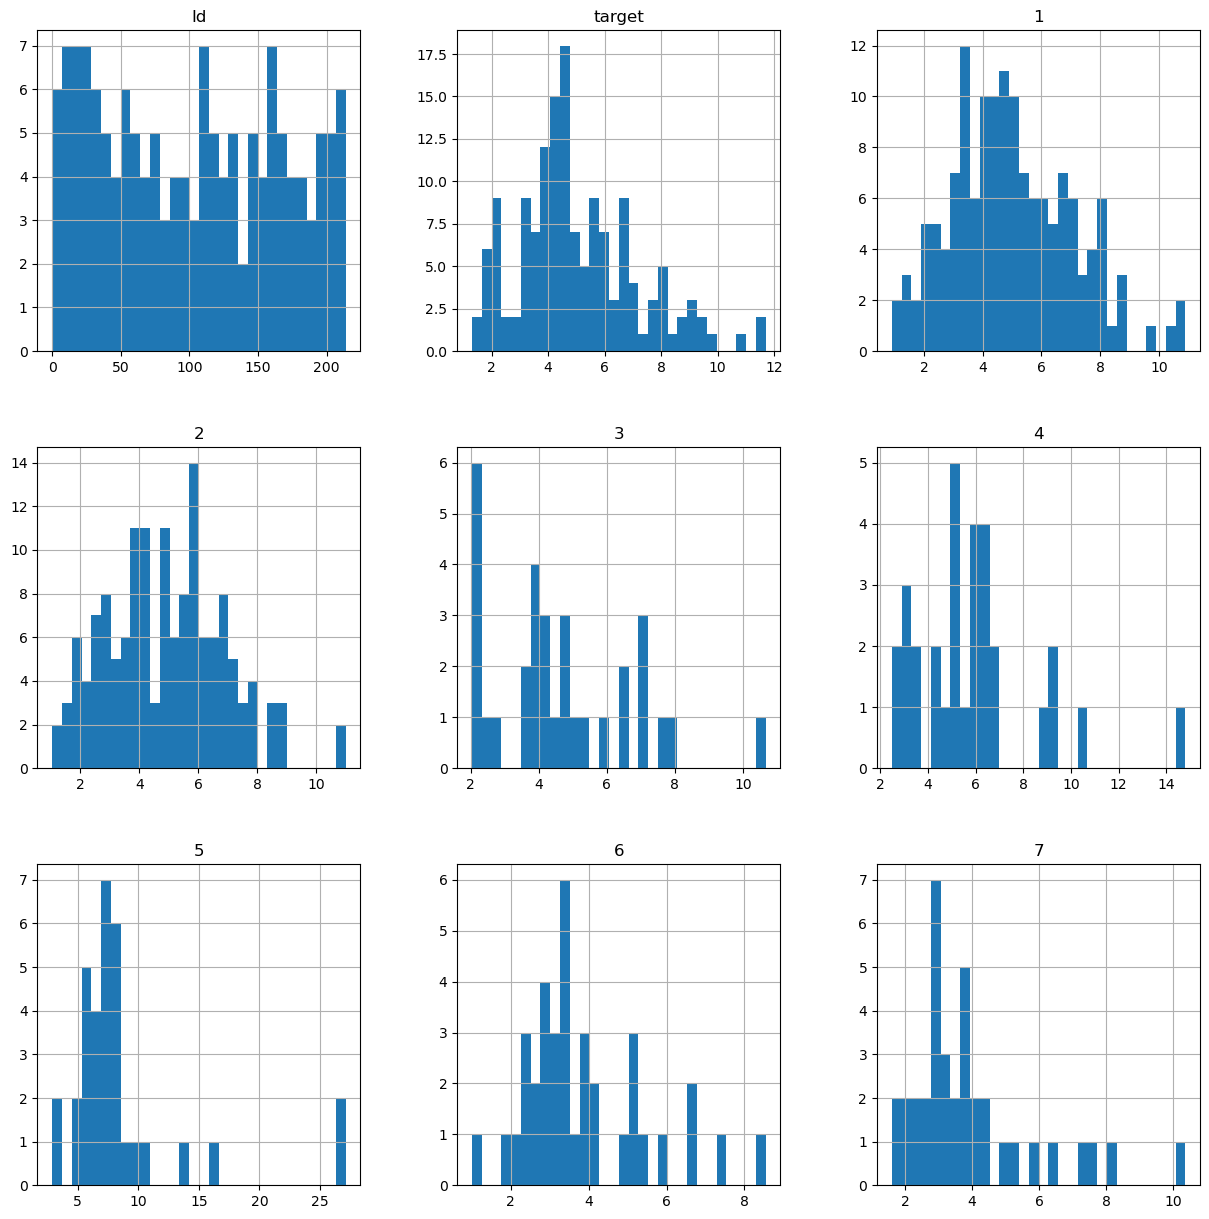

In [79]:
train0.hist(bins=30,figsize=(15,15))
plt.show()

<Axes: ylabel='target'>

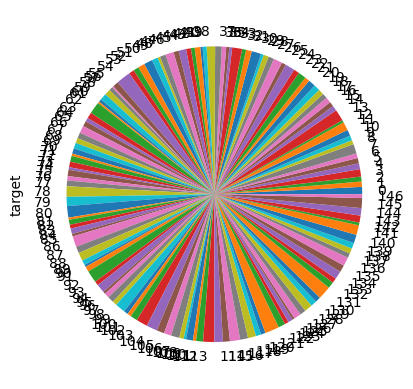

In [80]:

train0['target'].plot.pie()

# Data Prprocessing

In [9]:
target_name = 'target'

In [10]:
train0 = train0.drop(['Id','3','4','5','6','7'], axis = 1)
train0 = train0.dropna()
train0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  144 non-null    float64
 1   1       144 non-null    float64
 2   2       144 non-null    float64
dtypes: float64(3)
memory usage: 4.5 KB


In [11]:
train0.head(3)

,target,1,2
0,5.85,4.80,5.85
1,4.28,5.88,6.84
2,3.97,3.20,2.70


## 4. Preparing to modeling <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [12]:
target_name = 'target'

In [13]:
# For boosting model
train0b = train0
train_target0b = train0b[target_name]
train0b = train0b.drop([target_name], axis=1)
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [14]:
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [15]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [16]:
train0.head(3)

,1,2
0,-0.085038,0.464653
1,0.443331,0.963267
2,-0.867807,-1.121847


In [17]:
len(train0)

144

In [18]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [19]:
train.head(3)

,1,2
95,-0.804207,1.018669
92,1.284809,0.238010
50,1.064655,0.640931


In [20]:
test.head(3)

,1,2
7,-0.598730,-0.668561
89,-1.993038,-1.877323
97,-0.466638,-0.482211


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 95 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 7 to 112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       44 non-null     float64
 1   2       44 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [23]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [24]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [25]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [26]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

## 5. Tuning models and test for all features <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

- Linear Regression
- Support Vector Machines and Linear SVR
- Stochastic Gradient Descent, GradientBoostingRegressor, RidgeCV, BaggingRegressor
- Decision Tree Regression, Random Forest, XGBRegressor, LGBM, ExtraTreesRegressor
- MLPRegressor (Deep Learning)
- VotingRegressor

### 5.1 Linear Regression <a class="anchor" id="5.1"></a>

[Back to Table of Contents](#0.1)

In [27]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [4.32529806 6.70254355 6.59610886 5.0542072  6.78104442]
acc(r2_score) for train = 60.36
acc(relative error) for train = 20.35
acc(rmse) for train = 133.96
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.83541871 1.47138455 4.09166197 6.11293063 4.98155108]
acc(r2_score) for test = 54.23
acc(relative error) for test = 18.54
acc(rmse) for test = 138.13


### 5.2 Support Vector Machines <a class="anchor" id="5.2"></a>

[Back to Table of Contents](#0.1)

In [28]:
# Support Vector Machines

svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.97698808 6.6326201  6.63952068 4.78931402 6.59969371]
acc(r2_score) for train = 58.28
acc(relative error) for train = 20.56
acc(rmse) for train = 137.43
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.8526675  2.63887486 4.09505079 6.12287008 4.60583375]
acc(r2_score) for test = 49.2
acc(relative error) for test = 19.71
acc(rmse) for test = 145.53


### 5.3 Linear SVR <a class="anchor" id="5.3"></a>

[Back to Table of Contents](#0.1)

In [29]:
# Linear SVR

linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(2,linear_svr,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.63024369 6.78123318 6.49509452 4.80978797 6.97439721]
acc(r2_score) for train = 58.84
acc(relative error) for train = 20.14
acc(rmse) for train = 136.5
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.70948224 1.3585688  3.94249088 5.97676831 4.66332451]
acc(r2_score) for test = 50.41
acc(relative error) for test = 18.96
acc(rmse) for test = 143.79


### 5.4 MLPRegressor <a class="anchor" id="5.4"></a>

[Back to Table of Contents](#0.1)

In [30]:
# MLPRegressor

mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [5.97196492 5.87160786 6.29119957 5.23928948 5.61395838]
acc(r2_score) for train = 51.69
acc(relative error) for train = 23.05
acc(rmse) for train = 147.88
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.68186177 1.87740738 4.00759152 5.93318963 5.38407579]
acc(r2_score) for test = 37.81
acc(relative error) for test = 22.03
acc(rmse) for test = 161.02


### 5.5 Stochastic Gradient Descent <a class="anchor" id="5.5"></a>

[Back to Table of Contents](#0.1)

In [31]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [4.41730935 6.59743647 6.53280843 5.03726179 6.64916747]
acc(r2_score) for train = 60.28
acc(relative error) for train = 20.44
acc(rmse) for train = 134.08
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.80240406 1.45646892 4.0616448  6.06193038 4.98203444]
acc(r2_score) for test = 53.19
acc(relative error) for test = 18.7
acc(rmse) for test = 139.7


### 5.6 Decision Tree Regressor <a class="anchor" id="5.6"></a>

[Back to Table of Contents](#0.1)

In [32]:
# Decision Tree Regression

decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.6  6.98 6.9  7.7  6.5 ]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.0
acc(rmse) for train = 0.0
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.74 2.   3.55 5.65 5.85]
acc(r2_score) for test = 39.97
acc(relative error) for test = 22.36
acc(rmse) for test = 158.2


### 5.7 Random Forest <a class="anchor" id="5.7"></a>

[Back to Table of Contents](#0.1)

In [33]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest.fit(train, target)
print(random_forest.best_params_)
acc_model(6,random_forest,train,test)

{'n_estimators': 1000}
target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.40848 7.00792 6.70461 6.26788 6.48285]
acc(r2_score) for train = 92.29
acc(relative error) for train = 8.92
acc(rmse) for train = 59.09
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.58205 2.40031 4.05448 6.0044  5.34319]
acc(r2_score) for test = 43.88
acc(relative error) for test = 21.1
acc(rmse) for test = 152.97


### 5.8 XGB<a class="anchor" id="5.8"></a>

[Back to Table of Contents](#0.1)

In [ ]:
!pip install sklearn

In [119]:
xgbr = xgb.XGBRegressor({'objective': 'reg:squarederror'}) 
parameters = {'n_estimators': [60, 70, 80, 90, 95, 100, 105, 110, 120, 130, 140], 
              'learning_rate': [0.005, 0.01, 0.05, 0.075, 0.1],
              'max_depth': [3, 5, 7, 9],
              'reg_lambda': [0.1, 0.3, 0.5]}
xgb_reg = GridSearchCV(estimator=xgbr, param_grid=parameters).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(7,xgb_reg,trainb,testb)

ValueError: 
All the 3300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:43] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:44] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:45] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:46] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:47] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:48] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:50] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:51] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:53] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:55] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:57] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:58] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:40:59] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:00] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:01] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:02] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:04] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:06] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:07] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:09] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:11] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:12] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:13] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:15] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:17] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:18] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:20] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:21] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:23] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:24] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:26] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:28] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:29] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:30] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:32] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:34] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:36] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:37] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:38] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:39] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:40] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "C:\Users\Shree\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:41:41] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror



### 35.9 LGBM <a class="anchor" id="5.9"></a>

[Back to Table of Contents](#0.1)

In [120]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain)
valid_set = lgb.Dataset(Xval, Zval)

In [121]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,  valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 2
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 4.995750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [29]:
acc_boosting_model(8,modelL,trainb,testb,modelL.best_iteration)

target =  [4.25 6.83 5.   6.98 2.3 ]
ytrain =  [4.41576896 6.08410602 2.49602752 7.36956238 2.05810951]
acc(r2_score) for train = 73.8
acc(relative error) for train = 15.81
acc(rmse) for train = 105.06
target_test = [7.7 7.7 4.5 3.7 5.6]
ytest = [4.22529533 6.37616776 4.45892491 3.76320409 7.49702818]
acc(r2_score) for test = 26.71
acc(relative error) for test = 25.25
acc(rmse) for test = 189.47


### 5.9 GradientBoostingRegressor with HyperOpt<a class="anchor" id="5.10"></a>

[Back to Table of Contents](#0.1)

In [37]:
def hyperopt_gb_score(params):
    gbr = GradientBoostingRegressor(**params)
    current_score = cross_val_score(gbr, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

-0.05759785095709413                                                                                                   
{'max_depth': 2, 'n_estimators': 296}                                                                                  
-0.06766134243943803                                                                                                   
{'max_depth': 3, 'n_estimators': 145}                                                                                  
-0.12195957378264437                                                                                                   
{'max_depth': 9, 'n_estimators': 149}                                                                                  
-0.14546712228949493                                                                                                   
{'max_depth': 9, 'n_estimators': 402}                                                                                  
-0.10019156410889747                    

In [38]:
params = space_eval(space_gb, best)
params

{'max_depth': 3, 'n_estimators': 881}

In [39]:
# Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
acc_model(9,gradient_boosting,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.59937312 6.97731213 6.90059272 7.69291614 6.50285247]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.09
acc(rmse) for train = 0.6
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [2.36483788 1.90791498 4.05630607 6.26141776 4.66869179]
acc(r2_score) for test = 14.23
acc(relative error) for test = 25.96
acc(rmse) for test = 189.11


### 5.10 RidgeRegressor <a class="anchor" id="5.11"></a>

[Back to Table of Contents](#0.1)

In [40]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [4.53452559 6.50725995 6.4664661  5.06948577 6.54320504]
acc(r2_score) for train = 60.02
acc(relative error) for train = 20.51
acc(rmse) for train = 134.53
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.88928759 1.67110651 4.13686841 6.0254934  5.02562764]
acc(r2_score) for test = 53.85
acc(relative error) for test = 18.72
acc(rmse) for test = 138.71


### 5.11 BaggingRegressor <a class="anchor" id="5.12"></a>

[Back to Table of Contents](#0.1)

In [41]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.592 7.262 6.73  6.56  6.683]
acc(r2_score) for train = 89.65
acc(relative error) for train = 9.49
acc(rmse) for train = 68.45
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.552 1.99  3.948 5.777 5.772]
acc(r2_score) for test = 35.74
acc(relative error) for test = 23.56
acc(rmse) for test = 163.68


### 5.12 ExtraTreesRegressor <a class="anchor" id="5.13"></a>

[Back to Table of Contents](#0.1)

In [42]:
# Extra Trees Regressor

etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(12,etr,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.6  6.98 6.9  7.7  6.5 ]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.0
acc(rmse) for train = 0.0
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.5328 1.989  4.1231 5.911  4.9306]
acc(r2_score) for test = 34.18
acc(relative error) for test = 22.01
acc(rmse) for test = 165.65


### 5.14 AdaBoost Regressor <a class="anchor" id="5.14"></a>

[Back to Table of Contents](#0.1)

In [43]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [3.88666667 6.21814815 6.29666667 6.17824561 5.66638889]
acc(r2_score) for train = 79.44
acc(relative error) for train = 16.52
acc(rmse) for train = 96.47
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.75615385 2.62454545 4.18296296 5.33487805 5.06181818]
acc(r2_score) for test = 39.63
acc(relative error) for test = 22.28
acc(rmse) for test = 158.65


### 5.15 VotingRegressor <a class="anchor" id="5.15"></a>

[Back to Table of Contents](#0.1)

Thanks for the example of ensemling different models from 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor

In [44]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [3.6  6.98 6.9  7.7  6.5 ]
ytrain =  [4.4366343  6.59920022 6.53186438 5.05634202 6.65249776]
acc(r2_score) for train = 60.29
acc(relative error) for train = 20.44
acc(rmse) for train = 134.08
target_test = [7.7  4.25 3.4  7.1  9.  ]
ytest = [3.84289656 1.53327446 4.09767586 6.06749705 5.00044322]
acc(r2_score) for test = 53.82
acc(relative error) for test = 18.59
acc(rmse) for test = 138.75


## 6. Models comparison <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

We can now compare our models and to choose the best one for our problem.

In [45]:
from tensorflow.keras.models import Sequential
#from keras.models import Model

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [88]:
model = pd.DataFrame({'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVR', 'MLPRegressor', 'Stochastic Gradient Decent', 
              'Decision Tree Regressor', 'Random Forest',  'XGB', 'LGBM', 'GradientBoostingRegressor', 'RidgeRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 
              'AdaBoostRegressor', 'VotingRegressor'],
    
    
                     })

In [89]:
models1 =pd.DataFrame ({'r2_train': acc_train_r2,'r2_test':acc_test_r2, 'd_train': acc_train_d,'d_test': acc_test_d, 'rmse_train': acc_train_rmse, 'rmse_test': acc_test_rmse})
models1

,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
0,60.36,54.23,20.35,18.54,133.96,138.13
1,58.28,49.20,20.56,19.71,137.43,145.53
2,58.84,50.41,20.14,18.96,136.50,143.79
3,51.69,37.81,23.05,22.03,147.88,161.02
4,60.28,53.19,20.44,18.70,134.08,139.70
5,100.00,39.97,0.00,22.36,0.00,158.20
6,92.29,43.88,8.92,21.10,59.09,152.97
7,100.00,14.23,0.09,25.96,0.60,189.11
8,60.02,53.85,20.51,18.72,134.53,138.71
9,89.65,35.74,9.49,23.56,68.45,163.68


In [90]:
models=pd.concat([model,models1],axis=1)
models

,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
0,Linear Regression,60.36,54.23,20.35,18.54,133.96,138.13
1,Support Vector Machines,58.28,49.20,20.56,19.71,137.43,145.53
2,Linear SVR,58.84,50.41,20.14,18.96,136.50,143.79
3,MLPRegressor,51.69,37.81,23.05,22.03,147.88,161.02
4,Stochastic Gradient Decent,60.28,53.19,20.44,18.70,134.08,139.70
5,Decision Tree Regressor,100.00,39.97,0.00,22.36,0.00,158.20
6,Random Forest,92.29,43.88,8.92,21.10,59.09,152.97
7,XGB,100.00,14.23,0.09,25.96,0.60,189.11
8,LGBM,60.02,53.85,20.51,18.72,134.53,138.71
9,GradientBoostingRegressor,89.65,35.74,9.49,23.56,68.45,163.68


In [91]:
pd.options.display.float_format = '{:,.2f}'.format

In [92]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=True)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
7,XGB,100.00,14.23,0.09,25.96,0.60,189.11
10,RidgeRegressor,100.00,34.18,0.00,22.01,0.00,165.65
9,GradientBoostingRegressor,89.65,35.74,9.49,23.56,68.45,163.68
3,MLPRegressor,51.69,37.81,23.05,22.03,147.88,161.02
11,BaggingRegressor,79.44,39.63,16.52,22.28,96.47,158.65
5,Decision Tree Regressor,100.00,39.97,0.00,22.36,0.00,158.20
6,Random Forest,92.29,43.88,8.92,21.10,59.09,152.97
1,Support Vector Machines,58.28,49.20,20.56,19.71,137.43,145.53
2,Linear SVR,58.84,50.41,20.14,18.96,136.50,143.79
4,Stochastic Gradient Decent,60.28,53.19,20.44,18.70,134.08,139.70


#### print('Prediction accuracy for models by relative error - d_test')
#models.sort_values(by=['d_test', 'd_train'], ascending=True)

In [93]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
0,Linear Regression,60.36,54.23,20.35,18.54,133.96,138.13
8,LGBM,60.02,53.85,20.51,18.72,134.53,138.71
12,ExtraTreesRegressor,60.29,53.82,20.44,18.59,134.08,138.75
4,Stochastic Gradient Decent,60.28,53.19,20.44,18.70,134.08,139.70
2,Linear SVR,58.84,50.41,20.14,18.96,136.50,143.79
1,Support Vector Machines,58.28,49.20,20.56,19.71,137.43,145.53
6,Random Forest,92.29,43.88,8.92,21.10,59.09,152.97
5,Decision Tree Regressor,100.00,39.97,0.00,22.36,0.00,158.20
11,BaggingRegressor,79.44,39.63,16.52,22.28,96.47,158.65
3,MLPRegressor,51.69,37.81,23.05,22.03,147.88,161.02


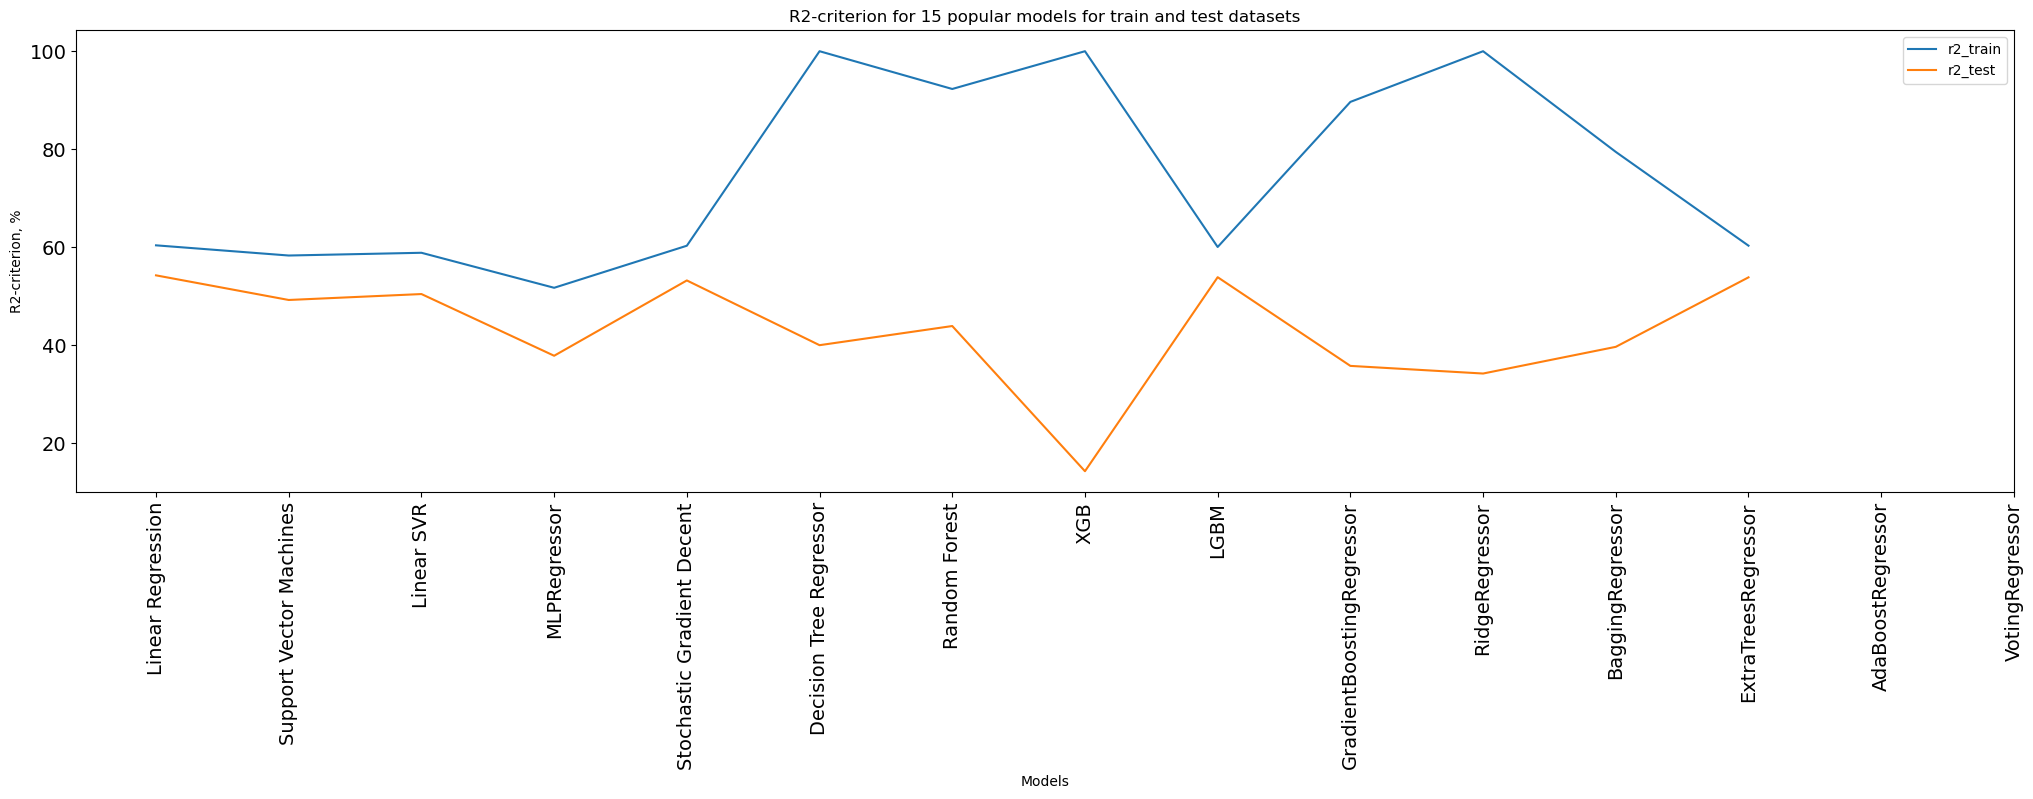

In [94]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

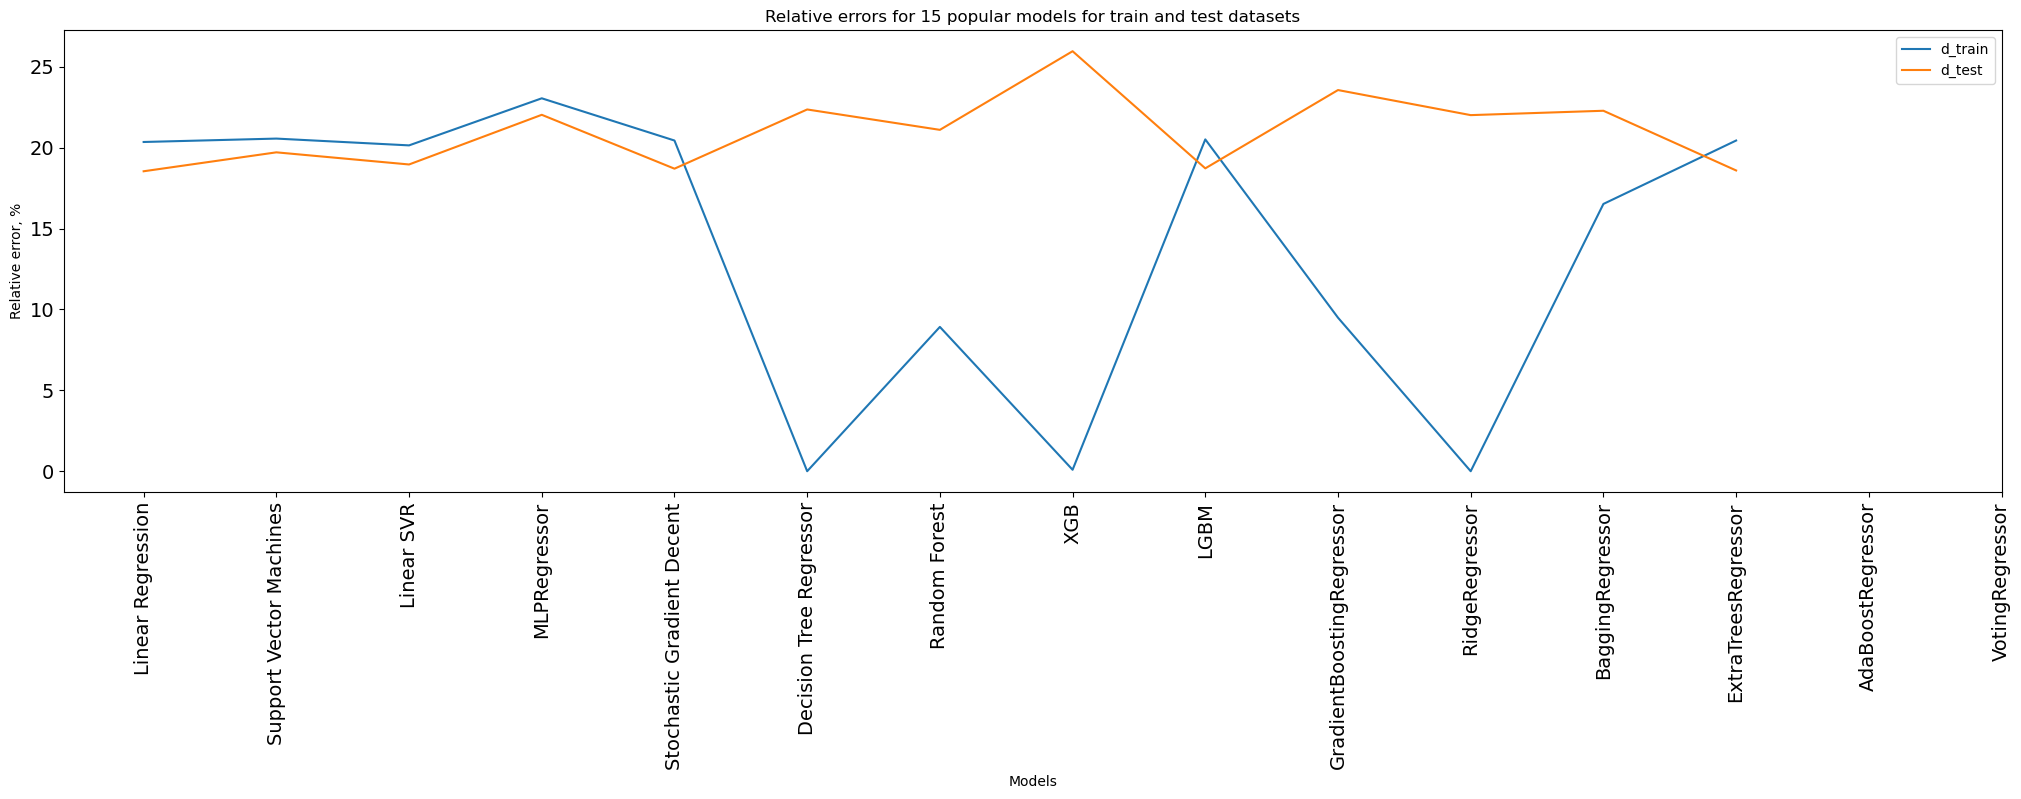

In [95]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

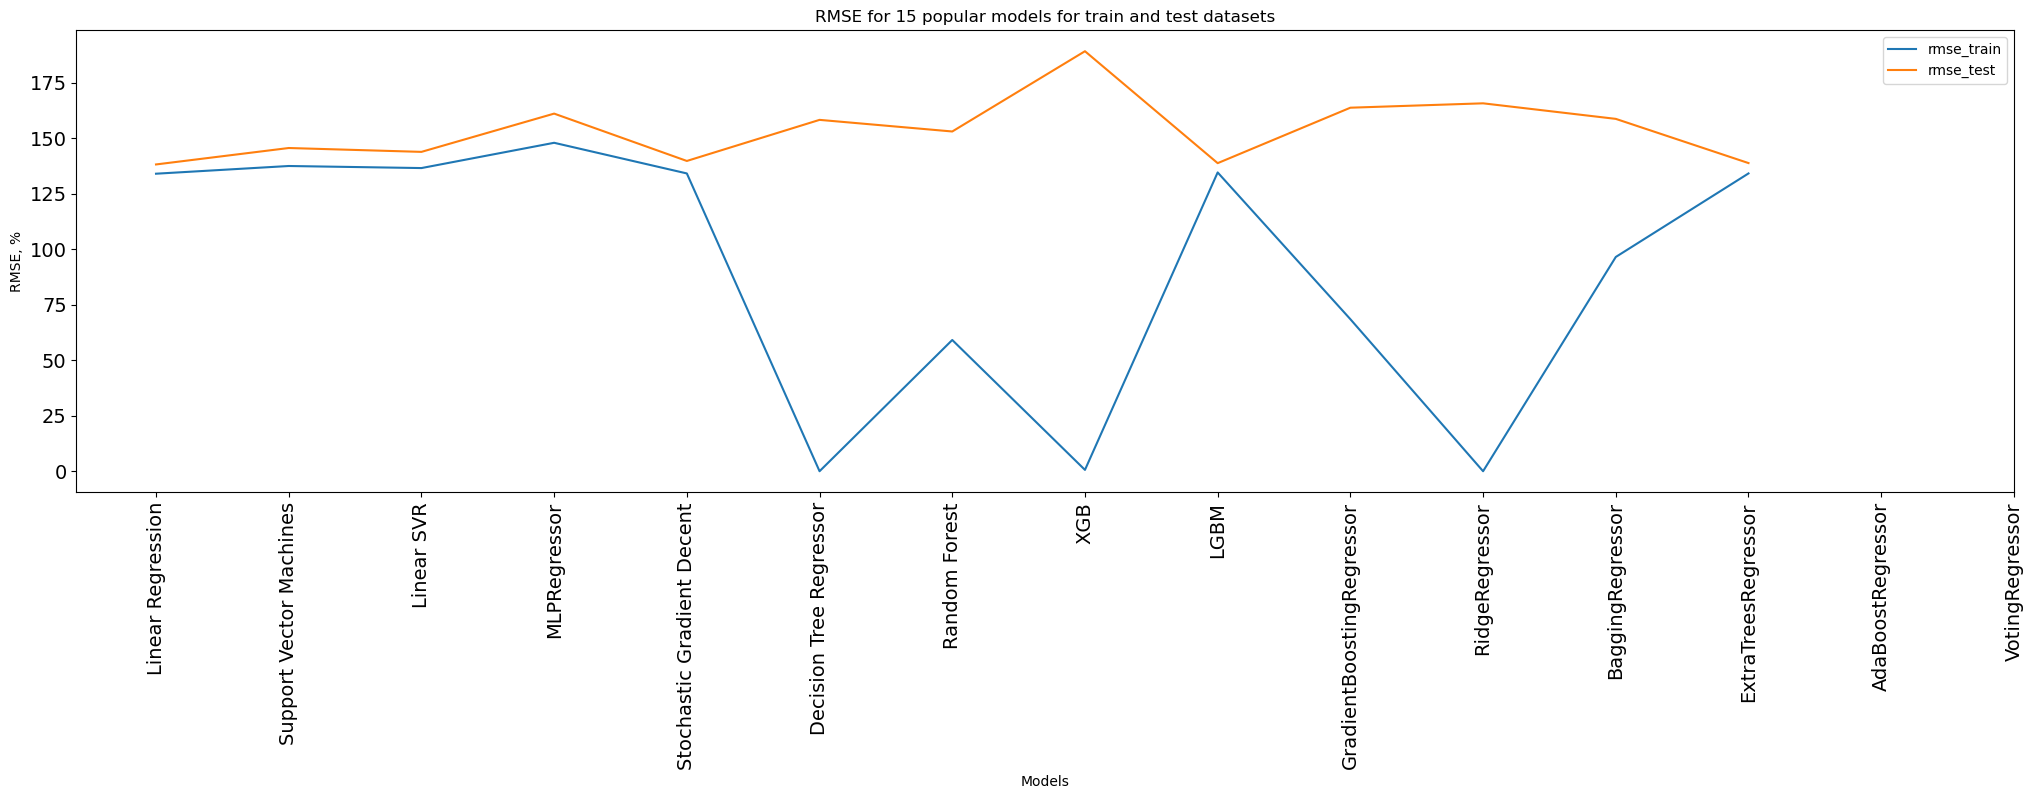

In [96]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

Thus, the best models by the RMSE are Linear Regression and Ridge Regressor.

## 7. Prediction <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [66]:
testn = pd.read_csv('test.csv')
testn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       15 non-null     float64
 4   4       15 non-null     float64
 5   5       16 non-null     float64
 6   6       14 non-null     float64
 7   7       14 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [57]:
testn = testn.drop(['Id','3','4','5','6','7'], axis = 1)
testn.head(3)

,1,2
0,6.80,5.40
1,4.71,4.20
2,2.10,3.40


In [58]:
#For models from Sklearn
testn = pd.DataFrame(scaler.transform(testn), columns = testn.columns)

In [59]:
#Linear Regression model for basic train
linreg.fit(train0, train_target0)
linreg.predict(testn)[:3]

array([6.33565611, 4.73935886, 2.87220788])

In [60]:
#Ridge Regressor model for basic train
ridge.fit(train0, train_target0)
ridge.predict(testn)[:3]

array([6.32349671, 4.73803635, 2.88768171])

[Go to Top](#0)

# conclusion
In this study, the usability of the regression analysis methods without measuring the daily BOD value was investigated. 
The results of the reression model  values were used to compare the performances of the methods. These two indices were used to determine errors and similarities according to the observed values
